##Example Output

Enter the tickers you would like to analyze one by one. Enter done when done. MSFT
Enter the tickers you would like to analyze one by one. Enter done when done. AMZN
Enter the tickers you would like to analyze one by one. Enter done when done. AAPL
Enter the tickers you would like to analyze one by one. Enter done when done. CSCO
Enter the tickers you would like to analyze one by one. Enter done when done. done
Time Period? (days) 365
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<BarContainer object of 4 artists>

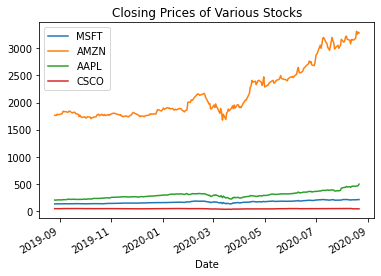

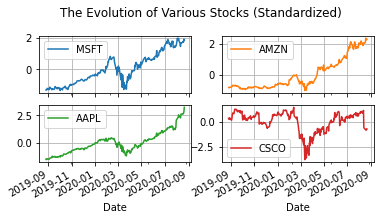

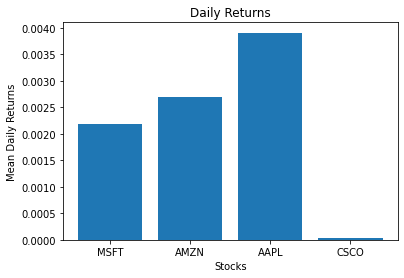

In [3]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 

tickers = []
finished = False 
while finished == False : 
    ticker = input("Enter the tickers you would like to analyze one by one. Enter done when done. ")
    if ticker == 'done' : 
        break
    if ticker == '' : 
        ticker = input("Enter a ticker: " )
        tickers += ticker,
    else : 
        tickers += ticker,
       
days = input("Time Period? (days) ")
if days == '' : 
    days = input("Enter a number of days : ")
    
start = dt.datetime.today()-dt.timedelta(int(days))
end = dt.datetime.today()
close_prices = pd.DataFrame() 

for ticker in tickers:
    close_prices[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
close_prices.plot(title="Closing Prices of Various Stocks")
cp_standardized= (close_prices-close_prices.mean())/close_prices.std()
cp_standardized.plot(subplots=True, layout=(3, 2), title="The Evolution of Various Stocks (Standardized)", grid=True)

daily_return = close_prices.pct_change() # Creates dataframe with daily return for each stock

fig, ax = plt.subplots()
ax.set(title="Daily Returns", xlabel="Stocks", ylabel="Mean Daily Returns")
plt.bar(daily_return.columns, daily_return.mean())

